## 7.1 Calculating the Normalized Difference Index
From https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index... the Normalized Difference Vegetation Index (NDVI) is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion:

(NIR - R) / (NIR + R)

NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have an NDVI value close to +1, there’s a high possibility that it’s dense green leaves. But when NDVI is close to zero, there are likely no green leaves and it could even be an urbanized area.

For this first exercise you will calculate NDVI over the LMU campus.

Load both red ('data/2023-02-22-sentinel-2-red-band.tiff') and NIR ('data/2023-02-22-sentinel-2-NIR-band.tiff') bands from images taken from Sentinel-2 satellite over the LMU campus on February 22, 2023. Make sure when loading to use masked=True. Why do we want to do this? Check to see if the bounds, resolution and CRS are the same for both datasets.

Calculate the NDVI. Export and save to a file as 'data/2023-02-22-sentinel-2-NDVI.tiff'

Plot the NDVI data using the colormap RdYlGn. Write 1-2 sentences describing patterns you notice.

Create a histogram with the custom bins: bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]. Write 1-2 sentences explaining patterns you notice. Lastly, print the max and min values.

In [2]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr
import xarray as xr


# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [3]:
# the absolute path is for me in case I change the location of the file. The rest of the file works without this.
# dem_pre_path = os.path.join('C:/Users/armen/Desktop/CIVL698/data')

In [4]:
red_band = rxr.open_rasterio('data/2023-02-22-sentinel-2-red-band.tiff', masked=True).squeeze()
red_band

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [5]:
nir_band = rxr.open_rasterio('data/2023-02-22-sentinel-2-NIR-band.tiff', masked=True).squeeze()
nir_band

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [6]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      red_band.rio.bounds() == nir_band.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      red_band.rio.resolution() == nir_band.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


## Part 2

In [7]:
ndvi = (nir_band - red_band) / (nir_band + red_band)


In [8]:
data_path = os.path.join('C:/Users/armen/Desktop/CIVL698/data/outputs')
#data_path = os.path.join("data","colorado-flood",
 #                        "spatial",
  #                       "outputs")

if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

The directory C:/Users/armen/Desktop/CIVL698/data/outputs exists!


# Part 3

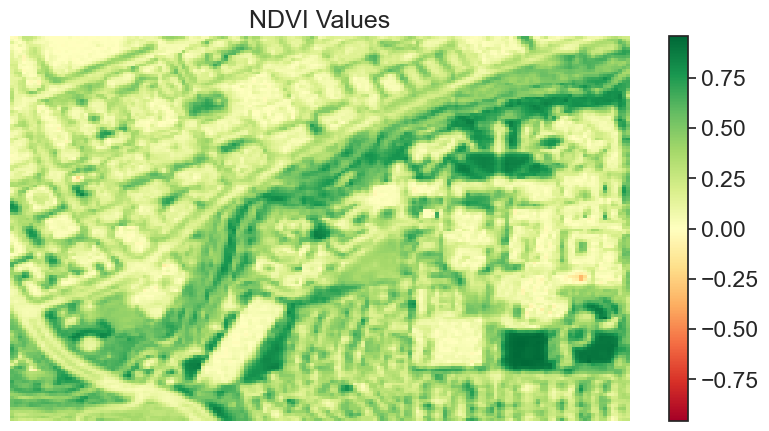

In [9]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
ndvi.plot(cmap="RdYlGn")
ax.set(title="NDVI Values")
ax.set_axis_off()
plt.show()

we can see the campus on the surroundings building next to campus, and the green areas the green leaves. There is one dot that is red which I think is the pool in the recreation center.

# Part 4

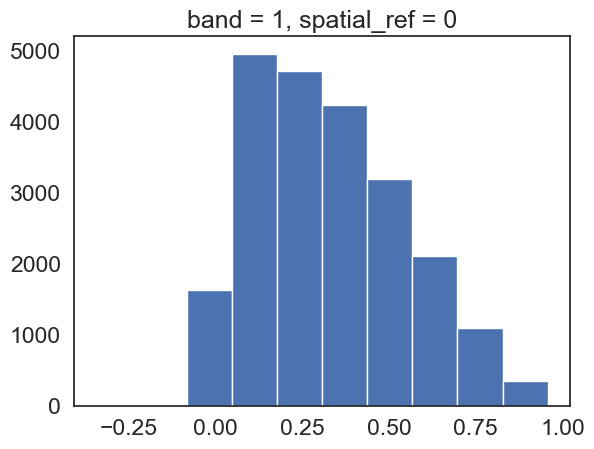

In [10]:
ndvi.plot.hist()
plt.show()

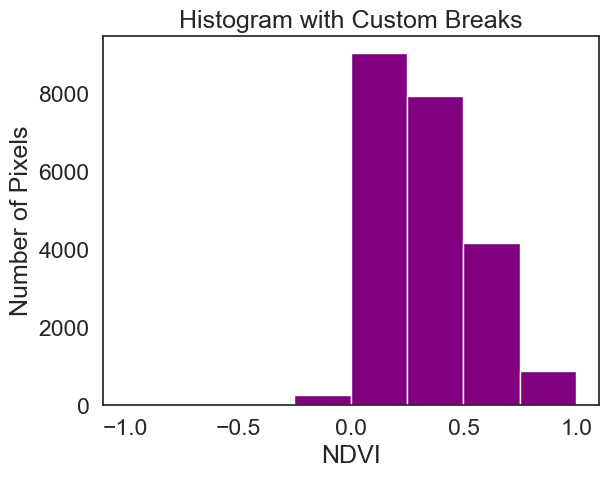

In [11]:
# Histogram with custom breaks
f, ax = plt.subplots()
ndvi.plot.hist(color="purple",
                        bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI",
       ylabel="Number of Pixels")

plt.show()

most of the values are between 0 and 0.5 which means most of the area is urban and covered with low vegetation

In [12]:
print('CHM min value:', np.nanmin(ndvi))
print('CHM max value:', np.nanmax(ndvi))

CHM min value: -0.3420191
CHM max value: 0.95758915


# Exercise 2
7.2 Manually Reclassify NDVI Data
Buildling on 7.1, let's now reclassify the NDVI data to more meaningful symbologies.

Use the following breaks to reclassify the NDVI data:
<0: water
0 to 0.2: urban/barren
0.2 to 0.5: low vegetation
 0.5: high vegetation
Note that you do not have to do any additional masking as your NoData mask already occured when loading in the data.

Plot the data using the following parameters:
colors = ['blue', 'beige', 'green', 'darkgreen']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
Write a few sentences of what you observe. Where does this classification scheme do well? Where does it not do well? Think of what you see walking around campus and how it compares to the map you generated.

Create a histogram of the classified NDVI data. Give rough approximations of the percentages of each cateogry (i.e. ~20% water, ~40% barren/urban land etc.)

In [13]:
# Check nodata value for your array
print(ndvi.rio.nodata)

None


In [23]:
class_bins = [-np.inf,0,0.2,0.5,np.inf]
class_bins

[-inf, 0, 0.2, 0.5, inf]

In [24]:
ndvi_class = xr.apply_ufunc(np.digitize,
                                     ndvi,
                                     class_bins)
ndvi_class

<xarray.DataArray (y: 140, x: 159)>
array([[1, 1, 2, ..., 3, 3, 3],
       [2, 1, 2, ..., 4, 3, 3],
       [2, 2, 2, ..., 4, 4, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 2, 3, 2],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)
Coordinates:
    band         int32 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int32 0

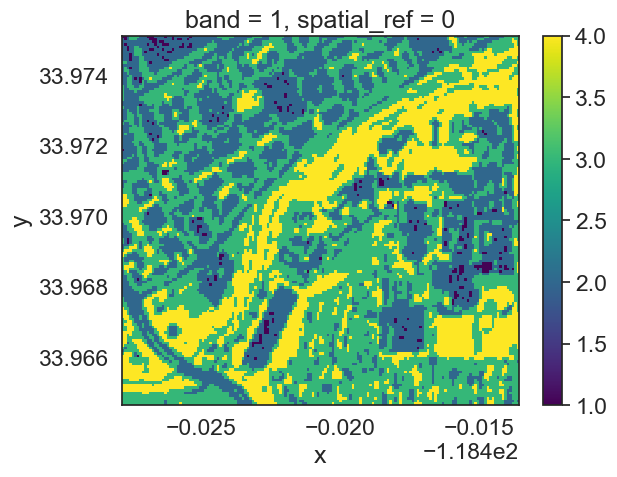

In [16]:
im = ndvi_class.plot.imshow()
ax.set_axis_off()

Part 2

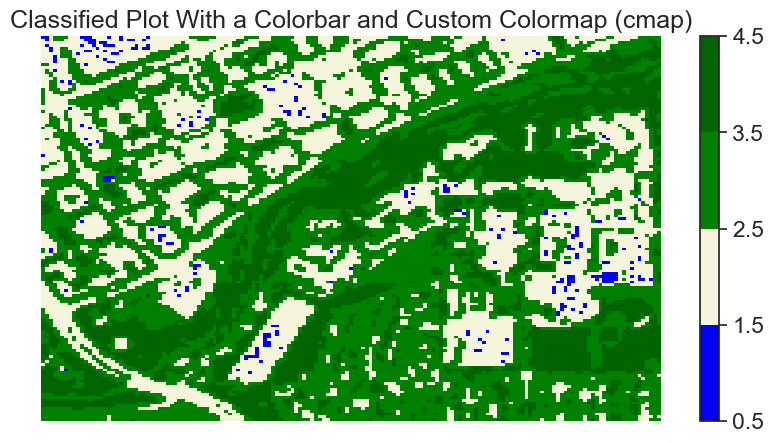

In [17]:
# Plot data using nicer colors
colors = ['blue', 'beige', 'green', 'darkgreen']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, 
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
ndvi_class.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap)")
ax.set_axis_off()
plt.show()

it shows the green areas which is beige (between 0.5 and 1.5). It's only good at finding green areas and not good at locating urbanized areas or with water

## Part 3

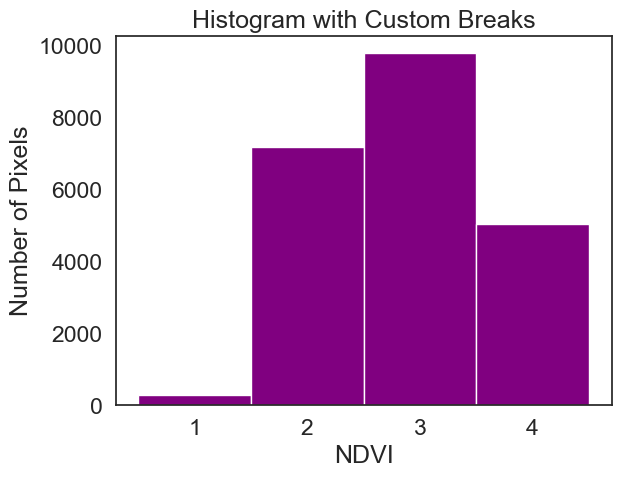

In [29]:
# Histogram with custom breaks
f, ax = plt.subplots()
ndvi_class.plot.hist(color="purple",
                        bins=[0.5,1.5,2.5,3.5,4.5])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI",
       ylabel="Number of Pixels")

plt.show()

In [125]:
import numpy as np
breaks = [-np.inf, 0, 0.2, 0.5, np.inf]
class_names = ['water', 'urban/barren', 'low vegetation', 'high vegetation']
classes = [0, 1, 2, 3]
# np.select returns an array drawn from elements in choicelist, depending on conditions.
ndvi_class = np.select([ndvi < breaks[1], (ndvi >= breaks[1]) & (ndvi < breaks[2]), 
                        (ndvi >= breaks[2]) & (ndvi < breaks[3]), ndvi >= breaks[3]], 
                       classes)

in order to calculate the percentage of each classsifcation, we have to get the number of cells of each classifaction and total number of cells 

In [20]:
no_cells = ndvi_class.size # returns total number of cells
unique, counts = np.unique(ndvi_class, return_counts=True) # returns the number of cells of each classification  

In [123]:
percentages = counts / no_cells * 100 # percentage of each
percentages= np.round(percentages,0)

In [130]:
for i in range(len(unique)):
    print(f'{class_names[i]}: ~{percentages[i]}%')
    #print("Class {}: {:.2f}%".format(unique[i], percentages[i]))

water: ~1.0%
urban/barren: ~32.0%
low vegetation: ~44.0%
high vegetation: ~23.0%


I got the help of chatGPT but I have understood each single step (I don't mind getting points deducted)